<a href="https://colab.research.google.com/github/Taeseo06/CodingStudy/blob/main/%5BMachineLearning%5D/DeepLearning_StudyProject(fastcampus)/2_Linear_Regression_rent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [117]:
rent_df = pd.read_csv('https://raw.githubusercontent.com/DSNote/fastcampus/main/rent.csv')

In [118]:
rent_df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2.0,10000,1100.0,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2.0,20000,800.0,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2.0,17000,1000.0,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,NaN,10000,800.0,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2.0,7500,850.0,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [119]:
rent_df.info()
# 데이터의 정보를 보여줌 -> 결측치 확인 할 수 있음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Posted On          4746 non-null   object 
 1   BHK                4743 non-null   float64
 2   Rent               4746 non-null   int64  
 3   Size               4741 non-null   float64
 4   Floor              4746 non-null   object 
 5   Area Type          4746 non-null   object 
 6   Area Locality      4746 non-null   object 
 7   City               4746 non-null   object 
 8   Furnishing Status  4746 non-null   object 
 9   Tenant Preferred   4746 non-null   object 
 10  Bathroom           4746 non-null   int64  
 11  Point of Contact   4746 non-null   object 
dtypes: float64(2), int64(2), object(8)
memory usage: 445.1+ KB


In [120]:
round(rent_df.describe(), 2)
# 데이터의 통계적 특성을 보여줌

,BHK,Rent,Size,Bathroom
count,4743.00,4746.00,4741.00,4746.00
mean,2.08,34993.45,967.48,1.97
std,0.83,78106.41,634.53,0.88
min,1.00,1200.00,10.00,1.00
25%,2.00,10000.00,550.00,1.00
50%,2.00,16000.00,850.00,2.00
75%,3.00,33000.00,1200.00,2.00
max,6.00,3500000.00,8000.00,10.00


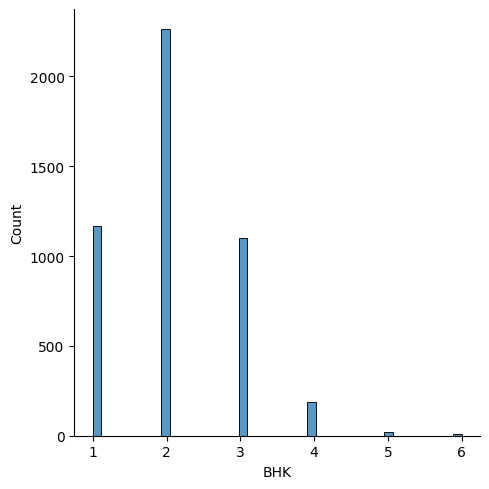

In [121]:
sns.displot(rent_df['BHK'])

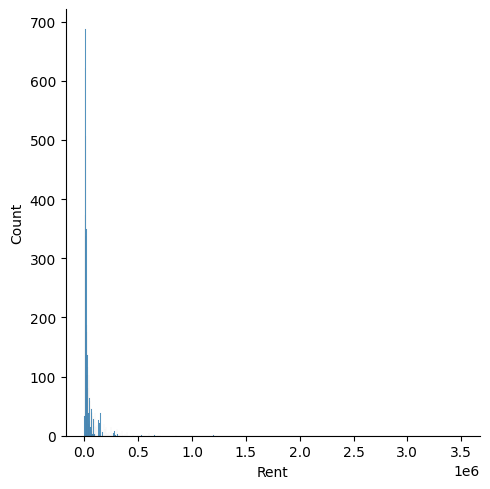

In [122]:
sns.displot(rent_df['Rent'])

In [123]:
rent_df['Rent'].sort_values()

4076       1200
285        1500
471        1800
2475       2000
146        2200
         ...   
1459     700000
1329     850000
827     1000000
1001    1200000
1837    3500000
Name: Rent, Length: 4746, dtype: int64

# 결측치 처리

In [124]:
rent_df.isna().sum()

# 결측치 확인
# .sum() -> "BHK" 결측치 3개, "Size" 결측치 5개

Posted On            0
BHK                  3
Rent                 0
Size                 5
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [125]:
rent_df.isna().mean()

Posted On            0.000000
BHK                  0.000632
Rent                 0.000000
Size                 0.001054
Floor                0.000000
Area Type            0.000000
Area Locality        0.000000
City                 0.000000
Furnishing Status    0.000000
Tenant Preferred     0.000000
Bathroom             0.000000
Point of Contact     0.000000
dtype: float64

In [126]:
# 결측치 있는 인덱스 제거
# rent_df.dropna(subset = ['Size'])

In [127]:
# 결측치 평균값으로 채우기
rent_df = rent_df.fillna(rent_df.median())

<ipython-input-127-b9a3264ac451>:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  rent_df = rent_df.fillna(rent_df.median())


In [128]:
rent_df.isna().mean( )

Posted On            0.0
BHK                  0.0
Rent                 0.0
Size                 0.0
Floor                0.0
Area Type            0.0
Area Locality        0.0
City                 0.0
Furnishing Status    0.0
Tenant Preferred     0.0
Bathroom             0.0
Point of Contact     0.0
dtype: float64

# 카테고리 변수 처리

In [129]:
rent_df.tail()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
4741,2022-05-18,2.0,15000,1000.0,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3.0,29000,2000.0,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3.0,35000,1750.0,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3.0,45000,1500.0,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent
4745,2022-05-04,2.0,15000,1000.0,4 out of 5,Carpet Area,Suchitra Circle,Hyderabad,Unfurnished,Bachelors,2,Contact Owner


In [130]:
# 고유값 종류 확인
rent_df['Area Type'].unique()

array(['Super Area', 'Carpet Area', 'Built Area'], dtype=object)

In [131]:
# 고유값 종류의 수 확인
rent_df['Area Type'].nunique()

3

In [132]:
# 고유값의 종류와 구성 확인
rent_df['Area Type'].value_counts()

Super Area     2446
Carpet Area    2298
Built Area        2
Name: Area Type, dtype: int64

In [133]:
rent_df.head(1)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2.0,10000,1100.0,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner


In [134]:
# 고유값 각각의 변수 개수 확인
for i in ['Area Type', 'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred', 'Point of Contact']:
  print(i, rent_df[i].nunique())

Area Type 3
Area Locality 2235
City 6
Furnishing Status 3
Tenant Preferred 3
Point of Contact 3


In [135]:
rent_df.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

In [136]:
rent_df = rent_df.drop(['Posted On', 'Floor', 'Area Locality'], axis = 1)

In [137]:
rent_df.head()

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2.0,10000,1100.0,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2.0,20000,800.0,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2.0,17000,1000.0,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2.0,10000,800.0,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2.0,7500,850.0,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [138]:
rent_df = pd.get_dummies(rent_df, columns = ['Area Type', 'City', 'Furnishing Status', 'Tenant Preferred', 'Point of Contact'])

In [140]:
rent_df.head()

,BHK,Rent,Size,Bathroom,Area Type_Built Area,Area Type_Carpet Area,Area Type_Super Area,City_Bangalore,City_Chennai,City_Delhi,...,City_Mumbai,Furnishing Status_Furnished,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Point of Contact_Contact Agent,Point of Contact_Contact Builder,Point of Contact_Contact Owner
0,2.0,10000,1100.0,2,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,1
1,2.0,20000,800.0,1,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
2,2.0,17000,1000.0,1,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
3,2.0,10000,800.0,1,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,1
4,2.0,7500,850.0,1,0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
